# Exercise 1 – Depth-First Search (DFS)

Implement DFS on the example graph used in class, both with recursion, and using an explicit stack.

Implement DFS on the example graph used in class, both with recursion, and using an explicit stack.

- Check that the path found matches the solution discussed in class.
- Then modify the graph (e.g. add or remove an edge) and run your code again — verify whether the result agrees with your intuitive expectation of how DFS explores the graph.

In [23]:
# ----------------------------------------------------------
# DFS using an explicit stack (iterative)
# ----------------------------------------------------------
def dfs_stack(graph, start, goal, verbose=False):
    """
    Depth-First Search (DFS) using a LIFO stack.
    Finds the first path from start to goal.
    Edge costs are ignored — DFS explores based on structure, not cost.
    """
    stack = [(start, [start])]  # each element: (node, path_so_far)

    while stack:
        if verbose:
            print("STACK:", [n for (n, _) in stack])

        node, path = stack.pop()  # LIFO pop
        if verbose:
            print(f"Expand: {node} | Path so far: {path}")

        # Goal check
        if node == goal:
            if verbose:
                print("Goal found!\n")
            return path

        # Explore children (reverse order to preserve left-to-right expansion)
        for child in reversed(graph[node].keys()):
            if child not in path:  # avoid cycles, NOT about visiting already seen nodes in general (I can expand the same node multiple times,, as long as they are not already present on the path)
                stack.append((child, path + [child]))

    return None


In [24]:
# ----------------------------------------------------------
# DFS using recursion (implicit call stack)
# ----------------------------------------------------------
def dfs_recursive(graph, node, goal, path=None, verbose=False):
    """
    Recursive Depth-First Search (DFS).
    Returns the first path found to the goal.
    Edge weights are ignored.
    """
    if path is None:
        path = [node]
        if verbose:
            print(f"Start DFS from {node}")

    # Goal check
    if node == goal:
        if verbose:
            print(f"Goal reached! Path: {path}\n")
        return path

    for child in graph[node].keys():
        if child not in path:
            if verbose:
                print(f"Going deeper: {node} -> {child}")
            result = dfs_recursive(graph, child, goal, path + [child], verbose)
            if result is not None:
                return result  # stop at the first found goal

    # Dead end
    return None


In [25]:
GRAPH = {
    "Start": {"A": 2, "B": 3, "D": 5},
    "A": {"C": 4},
    "B": {"D": 4},
    "C": {"D": 1, "Goal": 2},
    "D": {"Goal": 5},
    "Goal": {}
}


In [26]:
def demo(GRAPH):
    print("Iterative DFS (stack-based):")
    path = dfs_stack(GRAPH, "Start", "Goal", verbose=True)
    print("Resulting path:", path)

    print("\nRecursive DFS:")
    path = dfs_recursive(GRAPH, "Start", "Goal", verbose=True)
    print("Resulting path:", path)

demo(GRAPH)

Iterative DFS (stack-based):
STACK: ['Start']
Expand: Start | Path so far: ['Start']
STACK: ['D', 'B', 'A']
Expand: A | Path so far: ['Start', 'A']
STACK: ['D', 'B', 'C']
Expand: C | Path so far: ['Start', 'A', 'C']
STACK: ['D', 'B', 'Goal', 'D']
Expand: D | Path so far: ['Start', 'A', 'C', 'D']
STACK: ['D', 'B', 'Goal', 'Goal']
Expand: Goal | Path so far: ['Start', 'A', 'C', 'D', 'Goal']
Goal found!

Resulting path: ['Start', 'A', 'C', 'D', 'Goal']

Recursive DFS:
Start DFS from Start
Going deeper: Start -> A
Going deeper: A -> C
Going deeper: C -> D
Going deeper: D -> Goal
Goal reached! Path: ['Start', 'A', 'C', 'D', 'Goal']

Resulting path: ['Start', 'A', 'C', 'D', 'Goal']


In [27]:
GRAPH_2 = {
    "Start": {"A": 2, "B": 3, "D": 5},
    "A": {"C": 4},
    "B": {"D": 4},
    "C": {"D": 2},
    "D": {"E": 5, "Goal":1},
    "E": {"F": 1},
    "F": {"A": 3, "G": 2},
    "G": {"Goal": 1},
    "Goal": {}
}


demo(GRAPH_2)


Iterative DFS (stack-based):
STACK: ['Start']
Expand: Start | Path so far: ['Start']
STACK: ['D', 'B', 'A']
Expand: A | Path so far: ['Start', 'A']
STACK: ['D', 'B', 'C']
Expand: C | Path so far: ['Start', 'A', 'C']
STACK: ['D', 'B', 'D']
Expand: D | Path so far: ['Start', 'A', 'C', 'D']
STACK: ['D', 'B', 'Goal', 'E']
Expand: E | Path so far: ['Start', 'A', 'C', 'D', 'E']
STACK: ['D', 'B', 'Goal', 'F']
Expand: F | Path so far: ['Start', 'A', 'C', 'D', 'E', 'F']
STACK: ['D', 'B', 'Goal', 'G']
Expand: G | Path so far: ['Start', 'A', 'C', 'D', 'E', 'F', 'G']
STACK: ['D', 'B', 'Goal', 'Goal']
Expand: Goal | Path so far: ['Start', 'A', 'C', 'D', 'E', 'F', 'G', 'Goal']
Goal found!

Resulting path: ['Start', 'A', 'C', 'D', 'E', 'F', 'G', 'Goal']

Recursive DFS:
Start DFS from Start
Going deeper: Start -> A
Going deeper: A -> C
Going deeper: C -> D
Going deeper: D -> E
Going deeper: E -> F
Going deeper: F -> G
Going deeper: G -> Goal
Goal reached! Path: ['Start', 'A', 'C', 'D', 'E', 'F', 'G', 

Matches with our intuition on DFS, as it tends to produce "long solutions" in some cases

# Exercise 2. 
In search algorithms, we distinguish between:

🌳 Tree Search:
    - The algorithm explores all possible paths.
    - It does NOT remember which states have been visited globally.
    - It only avoids cycles within the current path.
    - As a result, the same state can be expanded multiple times 
      if it is reachable by different routes.

🕸 Graph Search:
    - The algorithm remembers all previously visited states
      in a global 'visited' (or 'explored') set.
    - It never re-expands a node once visited.
    - This prevents redundant work and infinite loops in cyclic graphs.

Below are two versions of DFS — one implements tree search, 
the other implements graph search. Check which one is which.

In [ ]:
# ==========================================================
# QUIZ: Tree Search vs Graph Search
# ==========================================================

# ----------------------------------------------------------
# Version 1: this is tree, as it can visit nodes as many times as it wants to (as long as it's not on the same path)
# ----------------------------------------------------------
def dfs_v1(graph, start, goal, verbose=False):
    stack = [(start, [start])]
    while stack:
        if verbose:
            print("STACK:", [n for (n, _) in stack])
        node, path = stack.pop()
        if verbose:
            print(f"Expanding: {node} | Path so far: {path}")
        if node == goal:
            if verbose:
                print("Goal reached!\n")
            return path
        # Expand all neighbors (reverse order for nicer visualization)
        for child in reversed(graph[node].keys()):
            if child not in path:
                stack.append((child, path + [child]))
    return None


# ----------------------------------------------------------
# Version 2: this is graph, as it each node at most once
# ----------------------------------------------------------
def dfs_v2(graph, start, goal, verbose=False):
    stack = [(start, [start])]
    visited = set()
    while stack:
        if verbose:
            print("STACK:", [n for (n, _) in stack])
        node, path = stack.pop()
        if node in visited:
            if verbose:
                print(f"Skip (already visited): {node}")
            continue
        visited.add(node)
        if verbose:
            print(f"Expanding: {node} | Path so far: {path}")
        if node == goal:
            if verbose:
                print("Goal reached!\n")
            return path
        for child in reversed(graph[node].keys()):
            if child not in visited:
                stack.append((child, path + [child]))
    return None

# Quick test (optional)
if __name__ == "__main__":
    print("v1 result:", dfs_v1(GRAPH, "Start", "Goal"))
    print("v2 result:", dfs_v2(GRAPH, "Start", "Goal"))


v1 result: ['Start', 'A', 'C', 'D', 'Goal']
v2 result: ['Start', 'A', 'C', 'D', 'Goal']


❓ QUIZ:
Look at the two implementations above (dfs_v1 and dfs_v2).

Q1. Which one is a TREE SEARCH, and which one is a GRAPH SEARCH?

V1 is tree search, V2 is graph search

Q2. What is the key difference in how they treat visited nodes?

In V1 visited nodes can be re-visited again, while in V2 we will not revisit nodes as we will check if they have been already visited or not

HINT:
  - In tree search, the same node can be expanded multiple times along different paths.
  - In graph search, each node is expanded at most once.

# Exercise 1.2
Compare the expanded nodes with the BFS and UCS versions

In [29]:
from collections import deque
import heapq 

GRAPH = {
    "Start": {"A": 2, "B": 3, "D": 5},
    "A": {"C": 4},
    "B": {"D": 4},
    "C": {"Goal": 2, "D": 1},
    "D": {"Goal": 5},
    "Goal": {}
}

# ----------------------------------------------------------
# Version 1 — tree
# ----------------------------------------------------------
def bfs_v1(graph, start, goal, verbose=False):
    queue = deque([(start, [start])])
    while queue:
        if verbose:
            print("QUEUE:", [n for (n, _) in queue])
        node, path = queue.popleft()
        if verbose:
            print(f"Expanding: {node} | Path so far: {path}")
        if node == goal:
            if verbose:
                print("Goal reached!\n")
            return path
        for child in graph[node].keys():
            if child not in path:  # avoid immediate cycles
                queue.append((child, path + [child]))
    return None


# ----------------------------------------------------------
# Version 2 — graph
# ----------------------------------------------------------
def bfs_v2(graph, start, goal, verbose=False):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        if verbose:
            print("QUEUE:", [n for (n, _) in queue])
        node, path = queue.popleft()
        if node in visited:
            if verbose:
                print(f"Skip (already visited): {node}")
            continue
        visited.add(node)
        if verbose:
            print(f"Expanding: {node} | Path so far: {path}")
        if node == goal:
            if verbose:
                print("Goal reached!\n")
            return path
        for child in graph[node].keys():
            if child not in visited:
                queue.append((child, path + [child]))
    return None

# DEMO RUN
# ----------------------------------------------------------
if __name__ == "__main__":
    print("=== BFS Version 1 ===")
    p1 = bfs_v1(GRAPH, "Start", "Goal", verbose=True)
    print("Path found:", p1)

    print("\n=== BFS Version 2 ===")
    p2 = bfs_v2(GRAPH, "Start", "Goal", verbose=True)
    print("Path found:", p2)

=== BFS Version 1 ===
QUEUE: ['Start']
Expanding: Start | Path so far: ['Start']
QUEUE: ['A', 'B', 'D']
Expanding: A | Path so far: ['Start', 'A']
QUEUE: ['B', 'D', 'C']
Expanding: B | Path so far: ['Start', 'B']
QUEUE: ['D', 'C', 'D']
Expanding: D | Path so far: ['Start', 'D']
QUEUE: ['C', 'D', 'Goal']
Expanding: C | Path so far: ['Start', 'A', 'C']
QUEUE: ['D', 'Goal', 'Goal', 'D']
Expanding: D | Path so far: ['Start', 'B', 'D']
QUEUE: ['Goal', 'Goal', 'D', 'Goal']
Expanding: Goal | Path so far: ['Start', 'D', 'Goal']
Goal reached!

Path found: ['Start', 'D', 'Goal']

=== BFS Version 2 ===
QUEUE: ['Start']
Expanding: Start | Path so far: ['Start']
QUEUE: ['A', 'B', 'D']
Expanding: A | Path so far: ['Start', 'A']
QUEUE: ['B', 'D', 'C']
Expanding: B | Path so far: ['Start', 'B']
QUEUE: ['D', 'C', 'D']
Expanding: D | Path so far: ['Start', 'D']
QUEUE: ['C', 'D', 'Goal']
Expanding: C | Path so far: ['Start', 'A', 'C']
QUEUE: ['D', 'Goal', 'Goal']
Skip (already visited): D
QUEUE: ['Goal',

In [30]:
# ----------------------------------------------------------
# Version 1 — UCS Tree Search
# ----------------------------------------------------------
def ucs_v1(graph, start, goal, verbose=False):
    """
    Uniform-Cost Search (TREE SEARCH)
    - Expands nodes in order of increasing path cost.
    - Does NOT maintain a visited set, so the same node
      may be expanded multiple times.
    """
    frontier = [(0, start, [start])]  # (total_cost, node, path)

    while frontier:
        frontier.sort(reverse=True)  # just to print it nicely
        if verbose:
            print("FRONTIER:", [(n, c) for c, n, _ in frontier])
        cost, node, path = heapq.heappop(frontier)
        if verbose:
            print(f"Expanding: {node} | cost={cost} | path={path}")
        if node == goal:
            if verbose:
                print("Goal reached!\n")
            return path, cost
        for child, edge_cost in graph[node].items():
            heapq.heappush(frontier, (cost + edge_cost, child, path + [child]))
    return None, float("inf")


# ----------------------------------------------------------
# Version 2 — UCS Graph Search
# ----------------------------------------------------------
def ucs_v2(graph, start, goal, verbose=False):
    """
    Uniform-Cost Search (GRAPH SEARCH)
    - Uses a 'best_cost' map to record the lowest cost found so far for each node.
    - Only expands a node if we find a cheaper path to it.
    """
    frontier = [(0, start, [start])]
    best_cost = {start: 0}

    while frontier:
        frontier.sort(reverse=True)
        if verbose:
            print("FRONTIER:", [(n, c) for c, n, _ in frontier])
        cost, node, path = heapq.heappop(frontier)
        if verbose:
            print(f"Expanding: {node} | cost={cost} | path={path}")
        if node == goal:
            if verbose:
                print("Goal reached!\n")
            return path, cost
        # Skip if this is not the cheapest known route to this node
        if cost > best_cost.get(node, float("inf")):
            continue
        for child, edge_cost in graph[node].items():
            new_cost = cost + edge_cost
            if new_cost < best_cost.get(child, float("inf")):
                best_cost[child] = new_cost
                heapq.heappush(frontier, (new_cost, child, path + [child]))
    return None, float("inf")

# ----------------------------------------------------------
# DEMO RUN
# ----------------------------------------------------------
if __name__ == "__main__":
    print("=== UCS Version 1 ===")
    path1, cost1 = ucs_v1(GRAPH, "Start", "Goal", verbose=True)
    print("Resulting path:", path1, "| Total cost:", cost1)

    print("\n=== UCS Version 2 ===")
    path2, cost2 = ucs_v2(GRAPH, "Start", "Goal", verbose=True)
    print("Resulting path:", path2, "| Total cost:", cost2)

=== UCS Version 1 ===
FRONTIER: [('Start', 0)]
Expanding: Start | cost=0 | path=['Start']
FRONTIER: [('D', 5), ('B', 3), ('A', 2)]
Expanding: D | cost=5 | path=['Start', 'D']
FRONTIER: [('Goal', 10), ('B', 3), ('A', 2)]
Expanding: Goal | cost=10 | path=['Start', 'D', 'Goal']
Goal reached!

Resulting path: ['Start', 'D', 'Goal'] | Total cost: 10

=== UCS Version 2 ===
FRONTIER: [('Start', 0)]
Expanding: Start | cost=0 | path=['Start']
FRONTIER: [('D', 5), ('B', 3), ('A', 2)]
Expanding: D | cost=5 | path=['Start', 'D']
FRONTIER: [('Goal', 10), ('B', 3), ('A', 2)]
Expanding: Goal | cost=10 | path=['Start', 'D', 'Goal']
Goal reached!

Resulting path: ['Start', 'D', 'Goal'] | Total cost: 10


With the BFS, we tend to explore more nodes, in this case being seven total.

On the other hand, the UCS algorithm will explore nodes that "cost less", resulting in shorter solutions in most cases (such as this one). Moreover, it is guaranteed that UCS's solution presents the lowest cost, while BFS doesn't assure such property

# Exercise 3 – Towers of Hanoi (UCS on state space)

Implement Uniform-Cost Search (UCS) over the Hanoi state space.

- State: three pegs, each a list of disk sizes (bottom → top).
- Move: take the top disk from one peg and place it on another peg if legal (target empty or top larger).
- Cost: each move has cost 1.
- Goal: reach the target peg configuration.

Test case should be such that at input  

```
n = 4
disks = list(range(1, n + 1))
initial_state = [disks, [], []]   # all on peg 0
goal_state    = [[], [], disks]   # all on peg 2

ucs(initial_state, goal_state)


```

output should be e.g. for n=2 [[2,1],[],[]] 

'move disk of size 1 from peg 1 to peg 2' [[2],[1],[]] 

' move disk of size 2 from peg 1 to peg 3' [[],[1],[2]] 

'move disk of size 1 from peg 2 to peg 3' [[],[],[1,2]] # total cost is 3


- Print how many states UCS expands for n = 2, 3, 4. How does this number grow with n? Can you explain why?
- Compare UCS with DFS and BFS.
- Run your DFS and BFS from Exercises 1–2 on the Hanoi problem.
What happens? Do they find the optimal solution? Why or why not?

## Solution Part 1: Implement UCS and analyze its performances

In [31]:
from copy import deepcopy
from itertools import product


def ucs_hanoi(start, goal, verbose=True, counter=False):
    """
    start is something like [ [1,2,3], [], [] ]
    goal is something like [ [], [], [1,2,3] ]
    """
    
    frontier = [(0, start, [start])]  # (total_cost, node, path)
    ctr = 0 # keep track of amount of visited nodes
    best_cost = {str(start): 0} # hack to fix lists being unhashable: convert list to its string representation

    while frontier:
        ctr += 1
        frontier.sort(reverse=False) 

        cost, node, path = heapq.heappop(frontier)


        if node == goal:
            if counter:
                return ctr

            if verbose:
                print("Goal reached!\n")
                
            return path, cost
    
        if cost > best_cost.get(str(node), float("inf")):
            continue

        # explore children 
        for (i,j) in product([0,1,2], [0,1,2]):
                # check if the child is legal or illegal
                if i == j or len(node[i])<=0:
                    continue 

                if len(node[j]) <= 0 or (node[j][0] > node[i][0]): # first condition is necessary to handle empty lists
                    pass

                else:
                    continue


                node_copy = deepcopy(node)

                disc = node_copy[i].pop(0)
                node_copy[j].insert(0, disc)

                if verbose:
                    print(f"Moving disk of size {disc} from peg {i} to peg {j}")
                    print(f"> {node} -> {node_copy}")
                    print()
    
                if cost+1 < best_cost.get(str(node_copy), float("inf")):
                    heapq.heappush(frontier, (cost + 1, node_copy, path + [node_copy]))
                    best_cost[str(node_copy)] = cost+1


    return None, float("inf")


In [32]:
# example demo 

if p := ucs_hanoi(
        [[1,2,3,4], [], []],
        [[],[], [1,2,3,4]],
        True):
    print("PROPOSED SOLUTION: ")

    ctr = 0
    for walk in p[0]:
        print(f"{ctr}. {walk}")
        ctr+=1

    print()

    print("PROPOSED SOLUTION'S COST: ")
    print(p[1])

Moving disk of size 1 from peg 0 to peg 1
> [[1, 2, 3, 4], [], []] -> [[2, 3, 4], [1], []]

Moving disk of size 1 from peg 0 to peg 2
> [[1, 2, 3, 4], [], []] -> [[2, 3, 4], [], [1]]

Moving disk of size 2 from peg 0 to peg 1
> [[2, 3, 4], [], [1]] -> [[3, 4], [2], [1]]

Moving disk of size 1 from peg 2 to peg 0
> [[2, 3, 4], [], [1]] -> [[1, 2, 3, 4], [], []]

Moving disk of size 1 from peg 2 to peg 1
> [[2, 3, 4], [], [1]] -> [[2, 3, 4], [1], []]

Moving disk of size 2 from peg 0 to peg 2
> [[2, 3, 4], [1], []] -> [[3, 4], [1], [2]]

Moving disk of size 1 from peg 1 to peg 0
> [[2, 3, 4], [1], []] -> [[1, 2, 3, 4], [], []]

Moving disk of size 1 from peg 1 to peg 2
> [[2, 3, 4], [1], []] -> [[2, 3, 4], [], [1]]

Moving disk of size 1 from peg 1 to peg 0
> [[3, 4], [1], [2]] -> [[1, 3, 4], [], [2]]

Moving disk of size 1 from peg 1 to peg 2
> [[3, 4], [1], [2]] -> [[3, 4], [], [1, 2]]

Moving disk of size 2 from peg 2 to peg 0
> [[3, 4], [1], [2]] -> [[2, 3, 4], [1], []]

Moving disk 

In [33]:
exploreds = []

k = 5

print("PRINTING AMOUNT OF VISITED STATES FOR n = 2, ..., 10")
for i in range(2, k+1):
    discs = list(range(1, i+1))

    p = ucs_hanoi([discs, [], []], [[], [], discs], verbose=False, counter=True)
    print(f"{i}: {p}")

    exploreds.append(p)

PRINTING AMOUNT OF VISITED STATES FOR n = 2, ..., 10
2: 6
3: 20
4: 66
5: 212


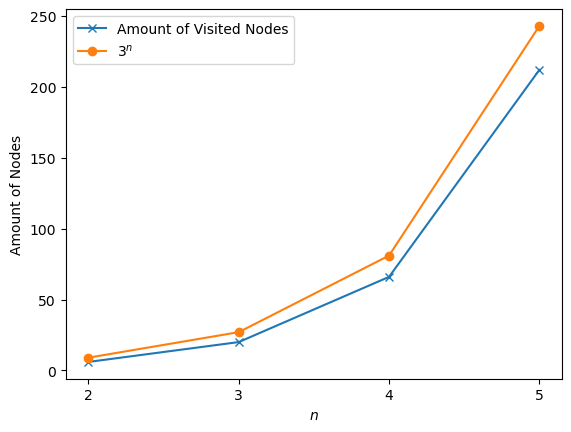

In [34]:
import matplotlib.pyplot as plt 
import numpy as np 

def f(n):
    return 3**n

plt.plot(list(range(2,k+1)), exploreds, marker="x", label="Amount of Visited Nodes")
plt.plot(list(range(2,k+1)), f(np.array(list(range(2,k+1)))), marker="o", label="$3^n$")
plt.xlabel("$n$")
plt.xticks(list(range(2, k+1)))
plt.ylabel("Amount of Nodes")
plt.legend()
plt.show()


We can notice that the line graph of amount of visited nodes follows the trend of the plot for the sequence $a_n := 3^n$. In fact, it is proven that $3^n$ is an upper bound of the *Hanoi Towers problem*; for an idea of the demonstration, consider that each of the $n$ disks can be placed on one of the three peg. Therefore, by counting each possible combination of positions possible we get $3^n$.

$$
|\mathcal S_n| \leq 3^n
$$

Moreover, as the line plots seem to *"fit perfectly with each other"*, we can consider that upper bound to be a *"good one"*.

## Part 2: Implement BFS/DFS and confront with UCS

In [35]:
# Implement BFS/DFS on Hanoi
def dfs_hanoi(start, goal, verbose=False, counter=False):
    ctr = 0
    stack = [(start, [start])]  # each element: (node, path_so_far)
    visited = set()

    while stack:
        ctr += 1
        node, path = stack.pop()  # LIFO pop
        
        if node == goal:
            if counter: 
                return ctr
            if verbose:
                print("Goal found!\n")
            return path
        
        visited.add(str(node))

        # Explore children (reverse order to preserve left-to-right expansion)
        for (i,j) in product([0,1,2], [0,1,2]):
                # check if the child is legal or illegal
                if i == j or len(node[i])<=0:
                    continue 

                if len(node[j]) <= 0 or (node[j][0] > node[i][0]): # first condition is necessary  to handle empty lists
                    pass

                else:
                    continue


                node_copy = deepcopy(node)

                disc = node_copy[i].pop(0)
                node_copy[j].insert(0, disc)

                if verbose:
                    print(f"Moving disk of size {disc} from peg {i} to peg {j}")
                    print(f"> {node} -> {node_copy}")
                    print()
    
                if str(node_copy) not in visited:
                    stack.append((node_copy, path + [node_copy]))

    return None

def bfs_hanoi(start, goal, verbose=False, counter=False):
    ctr = 0
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        ctr += 1
        node, path = queue.popleft()

        if node == goal:
            if counter:
                return ctr 
            
            if verbose:
                pass 
            return path
        
        visited.add(str(node))
        # visit child
        for (i,j) in product([0,1,2], [0,1,2]):
                # check if the child is legal or illegal
                if i == j or len(node[i])<=0:
                    continue 

                if len(node[j]) <= 0 or (node[j][0] > node[i][0]):
                    pass

                else:
                    continue


                node_copy = deepcopy(node)

                disc = node_copy[i].pop(0)
                node_copy[j].insert(0, disc)

                if verbose:
                    print(f"Moving disk of size {disc} from peg {i} to peg {j}")
                    print(f"> {node} -> {node_copy}")
                    print()
    
                if str(node_copy) not in visited:
                    queue.append((node_copy, path + [node_copy]))
    return None



In [36]:
# example demo 

if p := dfs_hanoi(
        [[1,2,3], [], []],
        [[],[], [1,2,3]],
        False):
    print("PROPOSED SOLUTION (DFS): ")

    ctr = 0
    for walk in p:
        print(f"{ctr}. {walk}")
        ctr+=1

    print()


if p := bfs_hanoi(
        [[1,2,3], [], []],
        [[],[], [1,2,3]],
        False):
    print("PROPOSED SOLUTION (BFS): ")

    ctr = 0
    for walk in p:
        print(f"{ctr}. {walk}")
        ctr+=1

    print()

# example demo 

if p := ucs_hanoi(
        [[1,2,3], [], []],
        [[],[], [1,2,3]],
        False):
    print("PROPOSED SOLUTION (UCS): ")

    ctr = 0
    for walk in p[0]:
        print(f"{ctr}. {walk}")
        ctr+=1

    print()


PROPOSED SOLUTION (DFS): 
0. [[1, 2, 3], [], []]
1. [[2, 3], [], [1]]
2. [[2, 3], [1], []]
3. [[3], [1], [2]]
4. [[3], [], [1, 2]]
5. [[1, 3], [], [2]]
6. [[1, 3], [2], []]
7. [[3], [2], [1]]
8. [[3], [1, 2], []]
9. [[], [1, 2], [3]]
10. [[], [2], [1, 3]]
11. [[1], [2], [3]]
12. [[1], [], [2, 3]]
13. [[], [], [1, 2, 3]]

PROPOSED SOLUTION (BFS): 
0. [[1, 2, 3], [], []]
1. [[2, 3], [], [1]]
2. [[3], [2], [1]]
3. [[3], [1, 2], []]
4. [[], [1, 2], [3]]
5. [[1], [2], [3]]
6. [[1], [], [2, 3]]
7. [[], [], [1, 2, 3]]

PROPOSED SOLUTION (UCS): 
0. [[1, 2, 3], [], []]
1. [[2, 3], [], [1]]
2. [[3], [2], [1]]
3. [[3], [1, 2], []]
4. [[], [1, 2], [3]]
5. [[1], [2], [3]]
6. [[1], [], [2, 3]]
7. [[], [], [1, 2, 3]]



As we can see, both UCS and BFS are optimal. However, DFS's solution is definetely not optimal.

The fact that UCS and BFS are both optimal is due to the fact that the weight-cost is always equal to one, which means that looking for a path with least cost is equivalent to searching for a path with least nodes. Noticing that it can be proven that BFS solves the latter, we have an explanation for this phenomenon.

In [37]:
exploreds = {'ucs': [], 'bfs':[], 'dfs': []}

k = 4

print("PRINTING AMOUNT OF VISITED STATES FOR n = 2, ..., k")
for i in range(2, k+1):
    discs = list(range(1, i+1))

    p_ucs = ucs_hanoi([discs, [], []], [[], [], discs], verbose=False, counter=True)
    p_dfs = dfs_hanoi([discs, [], []], [[], [], discs], verbose=False, counter=True)
    p_bfs = bfs_hanoi([discs, [], []], [[], [], discs], verbose=False, counter=True)

    exploreds['ucs'].append(p_ucs)
    exploreds['dfs'].append(p_dfs)
    exploreds['bfs'].append(p_bfs)


PRINTING AMOUNT OF VISITED STATES FOR n = 2, ..., k


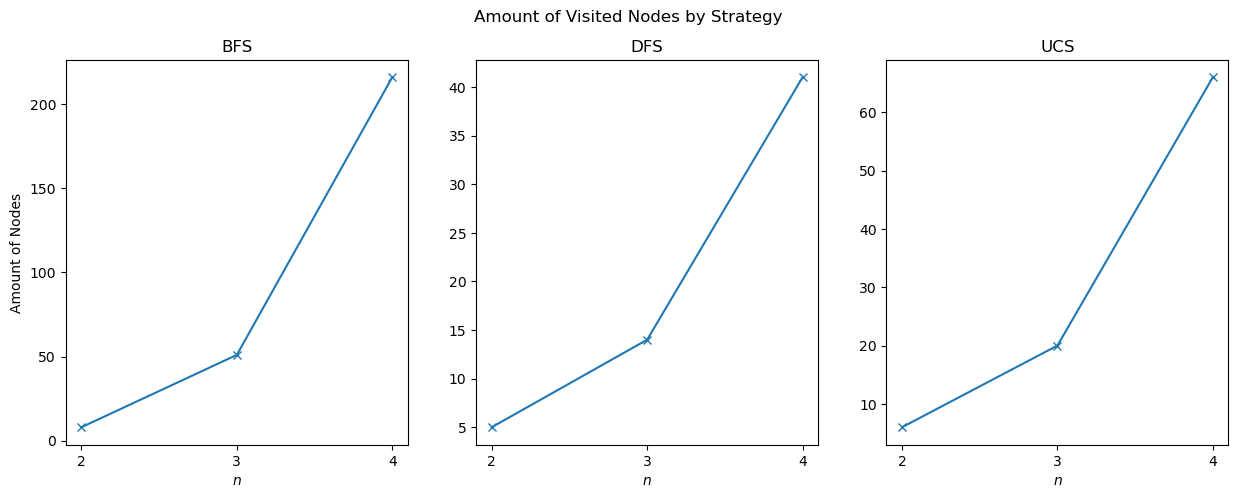

In [38]:
import matplotlib.pyplot as plt 
import numpy as np 


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(list(range(2,k+1)), exploreds['bfs'], marker="x")
axes[0].set_title("BFS")


axes[1].plot(list(range(2,k+1)), exploreds['dfs'], marker="x")
axes[1].set_title("DFS")

axes[2].plot(list(range(2,k+1)), exploreds['ucs'], marker="x")
axes[2].set_title("UCS")

axes[0].set_ylabel("Amount of Nodes")

axes[0].set_xlabel("$n$")
axes[1].set_xlabel("$n$")
axes[2].set_xlabel("$n$")

plt.suptitle("Amount of Visited Nodes by Strategy")
axes[0].set_xticks(list(range(2, k+1)))
axes[1].set_xticks(list(range(2, k+1)))
axes[2].set_xticks(list(range(2, k+1)))
plt.show()


In the figure above, we can easily compare BFS, DFS and UCS in relation to the amount of visited nodes. In particular, how they explore the state space: BFS is the "worst" strategy, as it tends to over-explore nodes. This makes sense, considering that BFS searches the whole state space "uniformly". Moreover, UCS explores less nodes, being however "surpassed" by DFS as its numbers are the lowest for each $n$. 

On the other hand, DFS finds the most expensive solution, while BFS and UCS finds the best solutions (see above)

Overall, UCS is the best algorithm as it explores a "good" portion (in the sense as it's not too much) of the state space and it produces the optimal solution.